In [38]:
import cv2
import numpy as np
from sklearn.metrics import accuracy_score,precision_score
import matplotlib.pyplot as plt
import time
import datetime

In [13]:
import math

In [2]:
eye = cv2.CascadeClassifier(r'C:/Users/Saicharan/haarcascades/haarcascade_eye.xml')

In [53]:
moment = 0

accc = []
timee = []
eyee = []
dont = []

cap = cv2.VideoCapture(0)

if cap.isOpened():
    ret,frame = cap.read()
else:
    ret = False

ret,frame1 = cap.read()
ret,frame2 = cap.read()

while ret:
    
    d = cv2.absdiff(frame2,frame1)
    gray = cv2.cvtColor(d,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(3,3),0)
    ret,th = cv2.threshold(blur,50,250,cv2.THRESH_BINARY)
    dilated = cv2.dilate(th,np.ones((1,1),np.uint8),iterations= 3)
    frame1 = frame2
    ret,frame2 = cap.read()
   
    cv2.imshow('blur',dilated)
    avg = np.count_nonzero(dilated)
    cv2.imshow('frame2',frame2)

    ts = time.time()
    timee.append(ts)
    accc.append(avg)
    
    if avg>0.5:
        moment = moment+1
        if(moment > 75):
            cv2.putText(frame2,'Dont look around ! ',(50,50),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
            dont.append(time.time())
            moment=0
            
    eyes = eye.detectMultiScale(frame2,1.5,7)

    for x,y,w,h in eyes:
        cv2.rectangle(frame2,(x,y),(x+w,y+h),(0,0,255),2)
        
    if(eyes == ()):
        for i in range(10):
            cv2.putText(frame2,'YOU ARE UNDER SURVEILLANCE.!!!',(50,300),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
            eyee.append(time.time())
            
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cv2.destroyAllWindows()
cap.release()

<ipython-input-53-a9112c5f2946>:48: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(eyes == ()):


In [58]:
avg = np.average(accc)
s = len(eyee)
avg_d = [avg for i in range(4420)]
moment_d = list(zip(eyee,avg_d))
dontt = list(zip(dont,avg_d))

In [62]:
dontt

[(1649695828.9217498, 8383.859416445623),
 (1649695833.0330987, 8383.859416445623),
 (1649695837.3584557, 8383.859416445623),
 (1649695839.902594, 8383.859416445623)]

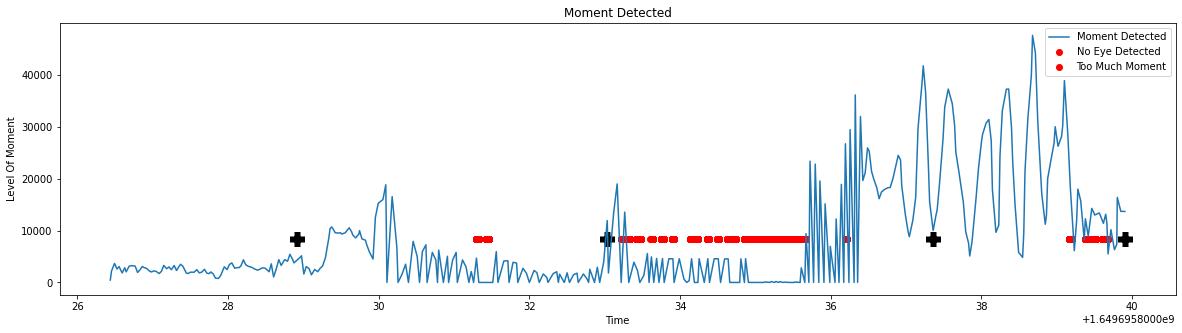

In [71]:
fig = plt.figure(figsize = (10, 5))
fig.set_figwidth(20)
fig.set_figheight(5)
# creating the bar plot

plt.plot(timee,accc,)

plt.xlabel("Time")
plt.ylabel("Level Of Moment")
plt.title("Moment Detected")

for x,y in moment_d:
    plt.scatter(x,y,color = 'red')
    
for x,y in dontt:
    plt.scatter(x,y, color = 'black',marker = '+',linewidths=15)
    
plt.legend(['Moment Detected','No Eye Detected','Too Much Moment'])
plt.show()

In [37]:
print(datetime.datetime.now())

2022-04-11 21:56:44.647993
